# IRONHACK DATATHON

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import randint
from scipy import stats

## Data Exploration and Data Cleaning

In [2]:
cookies_original = pd.read_csv('data/cookies.csv')

In [3]:
cookies_original

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,7,peanut butter,1.36,3
5194,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,7,raisins,1.80,3
5195,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,7,"chocolate, oats",1.07,3
5196,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,7,chocolate,1.77,3


### Managing missing values

In [4]:
# First we explore the missing values
cookies = cookies_original.copy()

In [5]:
cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

We can see there are three columns with missing values: *sugar index*, *bake time* and *mixins*.

In [6]:
# Describing numeric columns with missing values to determine the best approach.
cookies.describe()[['sugar index', 'bake time']]

,sugar index,bake time
count,5193.000000,5188.000000
mean,5.402465,10.494758
std,4.668342,1.194584
min,0.600000,8.000000
25%,1.800000,9.500000
50%,3.000000,10.300000
75%,8.000000,11.300000
max,31.600000,14.900000


We see *sugar index* has high variance while *bake time* has low variance. So, we decide to fill the missing values with the **median** for the *sugar index* column and the **mean** for the *bake time* column.

In [7]:
cookies['sugar index'].fillna(cookies['sugar index'].median(), inplace = True)
cookies['bake time'].fillna(cookies['bake time'].mean(), inplace = True)

As *mixins* is a categorical column we decide to drop the two rows with missing values.

In [8]:
cookies_removed_missing = cookies.dropna().copy()

In [9]:
# Check missing values management is correctly done.
cookies_removed_missing.isnull().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
diameter                0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

### Column Features

#### Processing numerical columns

In [10]:
# Explore columns features
cookies_removed_missing.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.0,5196.000000,5196.000000
mean,0.318172,5.401559,559.540031,30.400789,115.054946,0.995819,8.221900,0.530881,10.494602,7.326020,14.381197,7.0,1.499203,3.000577
std,0.149935,4.667039,353.306505,17.263360,56.480877,0.062205,0.283311,0.150912,1.193638,1.302232,3.024087,0.0,0.289139,0.024024
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996910,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


In [11]:
# We drop 'diameter' column because doesn't give any information.
cookies_removed_missing.drop(columns = 'diameter', inplace = True)

In [12]:
cookies_removed_missing['aesthetic appeal'].value_counts()

3    5193
4       3
Name: aesthetic appeal, dtype: int64

In [13]:
# We drop 'aesthetic appeal' column because doesn't give any information.
cookies_removed_missing.drop(columns = 'aesthetic appeal', inplace = True)

In [14]:
# Exploring negative values of 'calories' column.
cookies_removed_missing[cookies_removed_missing['calories'] < 0]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor
22,0.28,14.7,510,29.0,-99.0,0.99792,7.96,0.39,9.0,9,melted,14.0,"chocolate, oats",1.08
200,0.37,1.0,380,6.0,-99.0,0.99020,8.37,0.34,11.4,7,melted,11.2,raisins,1.67
906,0.26,2.1,830,17.0,-99.0,0.99616,8.29,0.56,9.8,6,cubed,14.8,"nuts, oats, chocolate",1.65
3099,0.17,12.0,460,65.0,-99.0,0.99760,8.15,0.38,9.0,8,melted,12.0,raisins,1.33
4428,0.26,9.7,300,39.0,-99.0,0.99080,8.08,0.56,12.9,9,melted,12.4,chocolate,1.82


In [15]:
# We drop the rows with negative values as possibly have been used as a placeholder for missing values.
cookies_removed_missing = cookies_removed_missing.drop(cookies_removed_missing[cookies_removed_missing['calories']<-98].index)

In [16]:
# Exploring negative values of 'weight' column.
cookies_removed_missing[cookies_removed_missing['weight'] < 0]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor
1783,0.27,9.6,370,19.0,105.0,0.99444,8.04,0.37,10.5,9,melted,-99.0,chocolate,1.74


In [17]:
cookies_removed_missing = cookies_removed_missing.drop(cookies_removed_missing[cookies_removed_missing['weight']<-98].index)

In [18]:
# Finally, we change 'bake temp' column values from Fahrenheit degrees to Celsius degrees for an easier data interpretation.
cookies_removed_missing['bake temp'] = (cookies_removed_missing['bake temp'] - 32)*5/9

#### Processing the categorical columns - *Mixins*

In [19]:
# Analysing the different values of the column.
cookies_removed_missing['mixins'].value_counts()

chocolate                         1891
raisins                           1198
chocolate, oats                    748
nuts, chocolate                    521
nuts,raisins                       333
nuts, oats, chocolate              294
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [20]:
# Converting values into onehot columns.
mix_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']

for m in mix_list:
    cookies_removed_missing[m] = 0
    cookies_removed_missing[m] = cookies_removed_missing['mixins'].str.contains(m).astype(int)
cookies_removed_missing.drop(columns = 'mixins', inplace = True)
cookies_removed_missing.reset_index(inplace = True)

In [21]:
# Check the proccess has been done correctly.
cookies_removed_missing

,index,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0,0.25,9.5,148.888889,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,1.30,0,1,0,0,0
1,1,0.23,3.3,271.111111,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,1.71,0,1,0,0,0
2,2,0.18,1.9,182.222222,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,1.78,1,0,0,1,0
3,3,0.18,10.5,254.444444,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,1.59,1,0,0,0,0
4,4,0.24,2.4,410.000000,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,1.30,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5193,0.66,2.0,198.888889,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,1.36,0,0,0,0,1
5186,5194,0.16,1.5,254.444444,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,1.80,0,1,0,0,0
5187,5195,0.25,14.3,248.888889,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,1.07,1,0,1,0,0
5188,5196,0.33,1.4,293.333333,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,1.77,1,0,0,0,0


#### Processing the categorical columns - *Butter type*

In [22]:
# OneHot encoding the 'butter type' column.
from sklearn.preprocessing import OneHotEncoder
oneH = OneHotEncoder()
cookies_cat = cookies_removed_missing.select_dtypes(include="object")
cookies_cat_1H = oneH.fit_transform(cookies_cat)

In [23]:
# We change 'butter type' column for a one hot column where 0 means 
cookies_removed_missing['1cubed/0melted'] = pd.DataFrame.sparse.from_spmatrix(cookies_cat_1H, columns = oneH.get_feature_names())['x0_cubed']
cookies_removed_missing.drop(columns = ['index','butter type'], inplace = True)
cookies_removed_missing

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,chocolate,raisins,oats,nuts,peanut butter,1cubed/0melted
0,0.25,9.5,148.888889,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,1.30,0,1,0,0,0,0.0
1,0.23,3.3,271.111111,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,1.71,0,1,0,0,0,0.0
2,0.18,1.9,182.222222,33.0,106.0,0.98746,8.21,0.83,14.0,9,9.4,1.78,1,0,0,1,0,0.0
3,0.18,10.5,254.444444,41.0,124.0,0.99630,8.14,0.35,10.5,7,12.2,1.59,1,0,0,0,0,0.0
4,0.24,2.4,410.000000,6.0,33.0,0.99740,8.09,0.57,9.4,5,19.8,1.30,1,0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,0.66,2.0,198.888889,15.0,88.0,0.99357,8.66,0.60,11.5,6,11.6,1.36,0,0,0,0,1,1.0
5186,0.16,1.5,254.444444,10.0,97.0,0.99170,8.48,0.44,10.7,8,10.0,1.80,0,1,0,0,0,0.0
5187,0.25,14.3,248.888889,79.0,149.0,0.99750,8.12,0.37,9.7,7,13.4,1.07,1,0,1,0,0,0.0
5188,0.33,1.4,293.333333,35.0,136.0,0.99380,8.63,0.78,10.3,8,13.8,1.77,1,0,0,0,0,0.0


In [24]:
cookies_processed = cookies_removed_missing.copy()
cookies_processed.to_csv('data/cookies-raw.csv')

## Outliers

Having all the columns with the desired type and with no missing values we proceed to explore de data and determine whereas there are outliers that can affect negatively our model. First, we plot the columns to have an initial idea of the distribution and wide of the values.

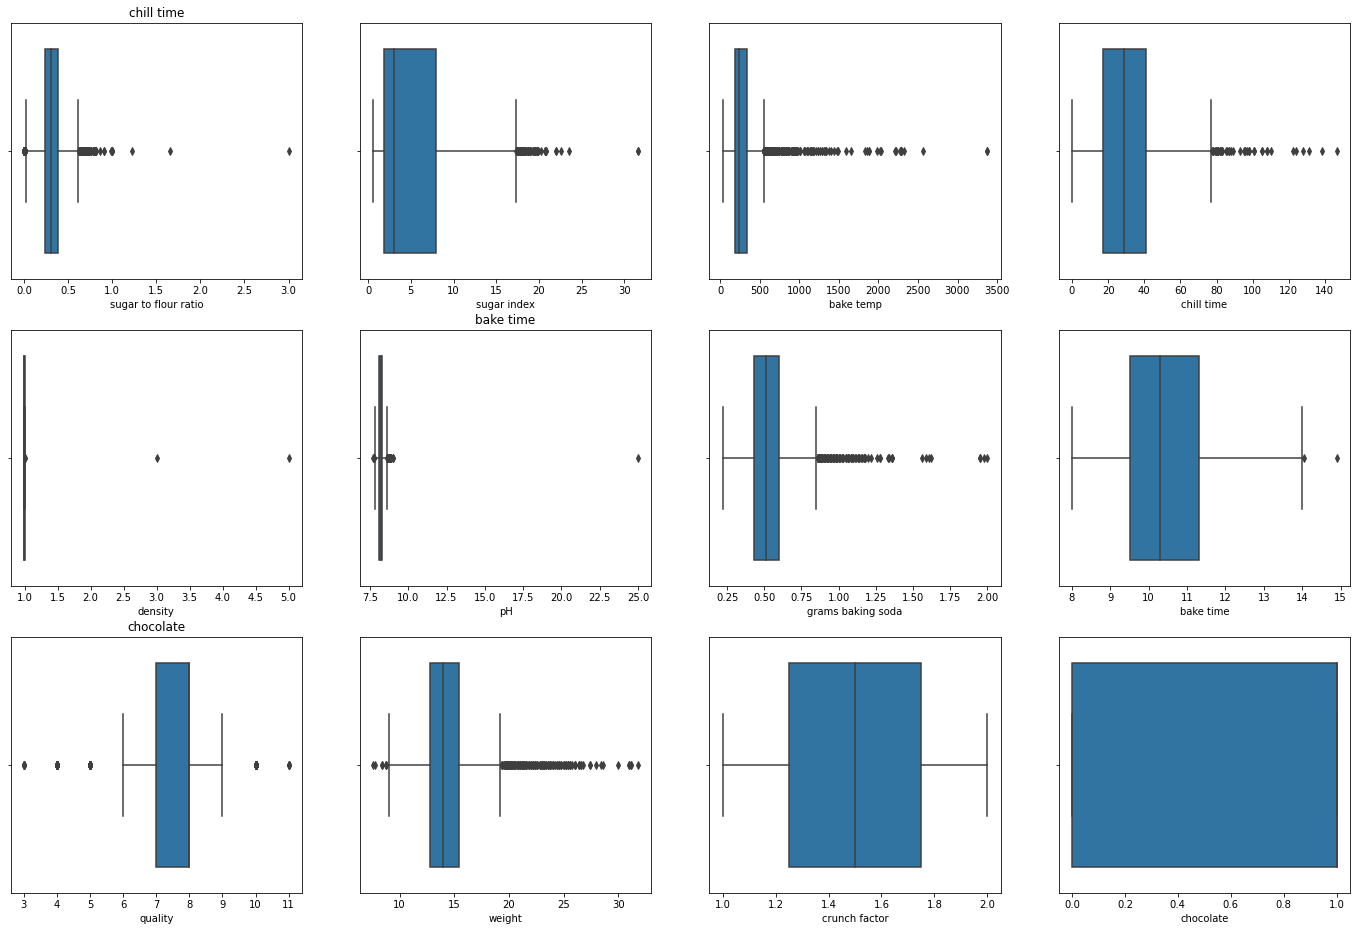

In [25]:
fig, ax = plt.subplots(3, 4, figsize = (24,16))
for i in range(4):
    sns.boxplot(cookies_processed[cookies_processed.columns[i]], ax = ax[0, i])
    sns.boxplot(cookies_processed[cookies_processed.columns[i+5]], ax = ax[1, i])
    sns.boxplot(cookies_processed[cookies_processed.columns[i+9]], ax = ax[2, i])
    ax[0,0].set_title(cookies_processed.columns[i])
    ax[1,1].set_title(cookies_processed.columns[i+5])
    ax[2,0].set_title(cookies_processed.columns[i+9])

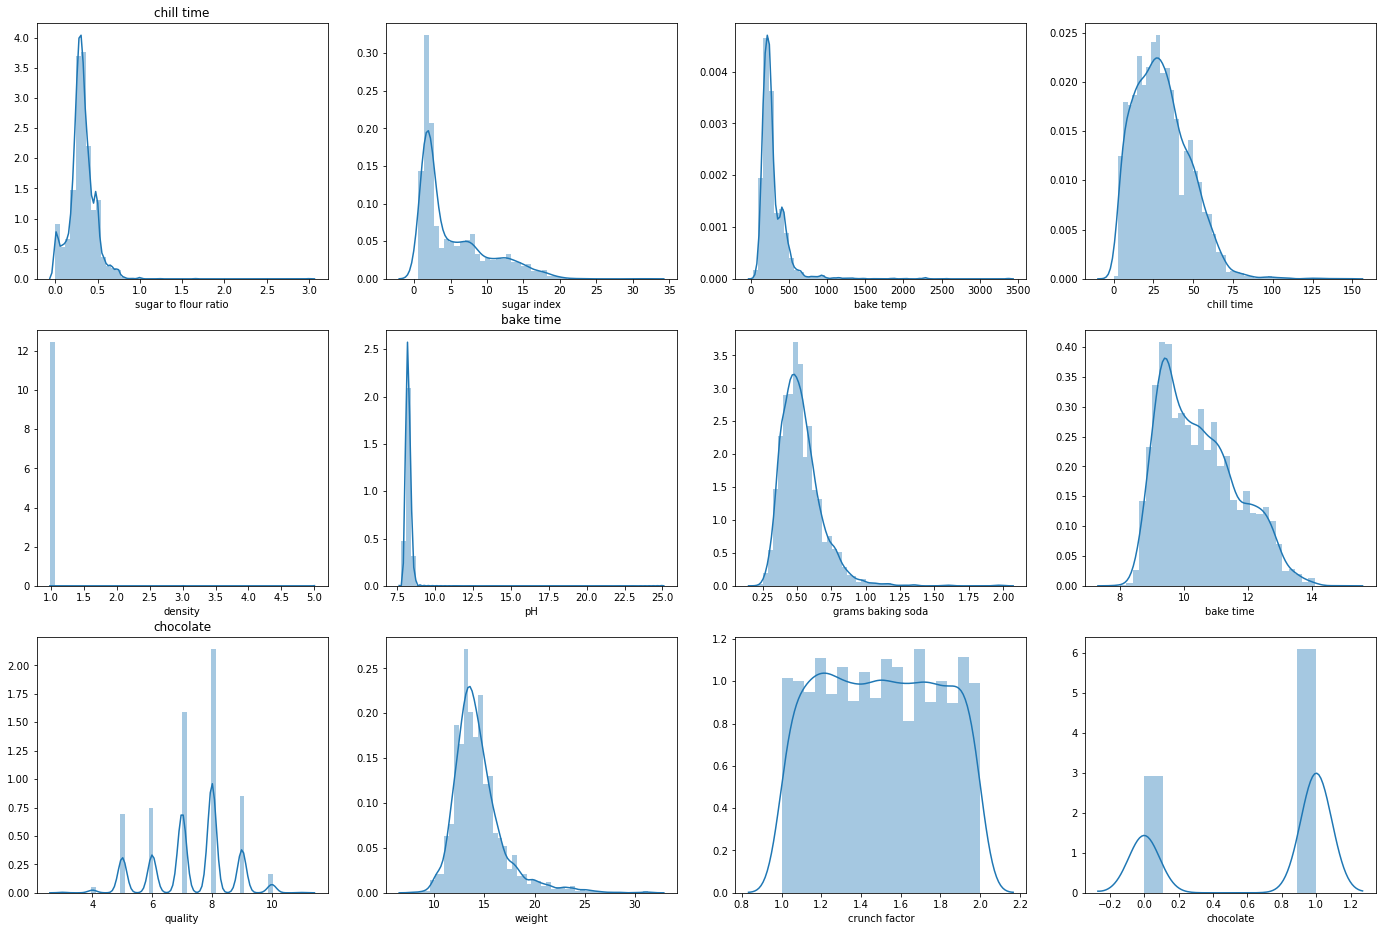

In [26]:
fig, ax = plt.subplots(3, 4, figsize = (24,16))
for i in range(4):
    sns.distplot(cookies_processed[cookies_processed.columns[i]], ax = ax[0, i])
    sns.distplot(cookies_processed[cookies_processed.columns[i+5]], ax = ax[1, i])
    sns.distplot(cookies_processed[cookies_processed.columns[i+9]], ax = ax[2, i])
    ax[0,0].set_title(cookies_processed.columns[i])
    ax[1,1].set_title(cookies_processed.columns[i+5])
    ax[2,0].set_title(cookies_processed.columns[i+9])

We see some of the columns follow a normal distribution that is affected by extreme values. Then, we're going to determine if these extreme values can be determined as outliers and if so drop them from the dataframe.

In [27]:
x = cookies_processed[['sugar to flour ratio', 'bake temp', 'chill time', 'density', 'pH', 'grams baking soda', 'weight']].copy()
outliers = np.abs(stats.zscore(x))
threshold = 3
print(np.where(outliers>3))

(array([  13,   16,   18,   44,   44,   55,   69,   77,   85,  138,  205,
        233,  239,  239,  240,  258,  271,  287,  300,  300,  312,  319,
        325,  325,  334,  356,  366,  385,  392,  424,  433,  433,  447,
        506,  515,  517,  541,  549,  559,  582,  591,  605,  637,  681,
        690,  690,  710,  718,  736,  740,  747,  758,  797,  803,  810,
        811,  827,  833,  836,  873,  883,  885,  886,  887,  910,  954,
        971,  973,  983, 1000, 1000, 1029, 1033, 1045, 1057, 1093, 1095,
       1134, 1144, 1144, 1179, 1210, 1220, 1227, 1240, 1240, 1265, 1267,
       1279, 1325, 1340, 1376, 1377, 1428, 1432, 1440, 1463, 1476, 1479,
       1496, 1499, 1601, 1609, 1623, 1654, 1658, 1696, 1704, 1731, 1777,
       1789, 1797, 1833, 1838, 1869, 1874, 1876, 1876, 1880, 1907, 1930,
       1931, 1932, 2022, 2029, 2042, 2061, 2097, 2097, 2097, 2117, 2137,
       2176, 2177, 2194, 2196, 2197, 2252, 2294, 2329, 2344, 2356, 2388,
       2390, 2393, 2395, 2413, 2451, 2456, 2468, 2

In [28]:
cookies_cleaned = cookies_processed[(outliers<3).all(axis = 1)].copy()
cookies_cleaned.reset_index(inplace = True)
cookies_cleaned.drop(columns = 'index', inplace = True)

In [29]:
# 'Quality' column doesn't follow a normal distribution but having a score of eleven does not make sense so we drop the rows with
# quality values equal to 11.
cookies_cleaned.drop(cookies_cleaned[cookies_cleaned['quality'] == 11].index, inplace = True)
cookies_cleaned.reset_index(inplace = True)
cookies_cleaned.drop(columns = 'index', inplace = True)

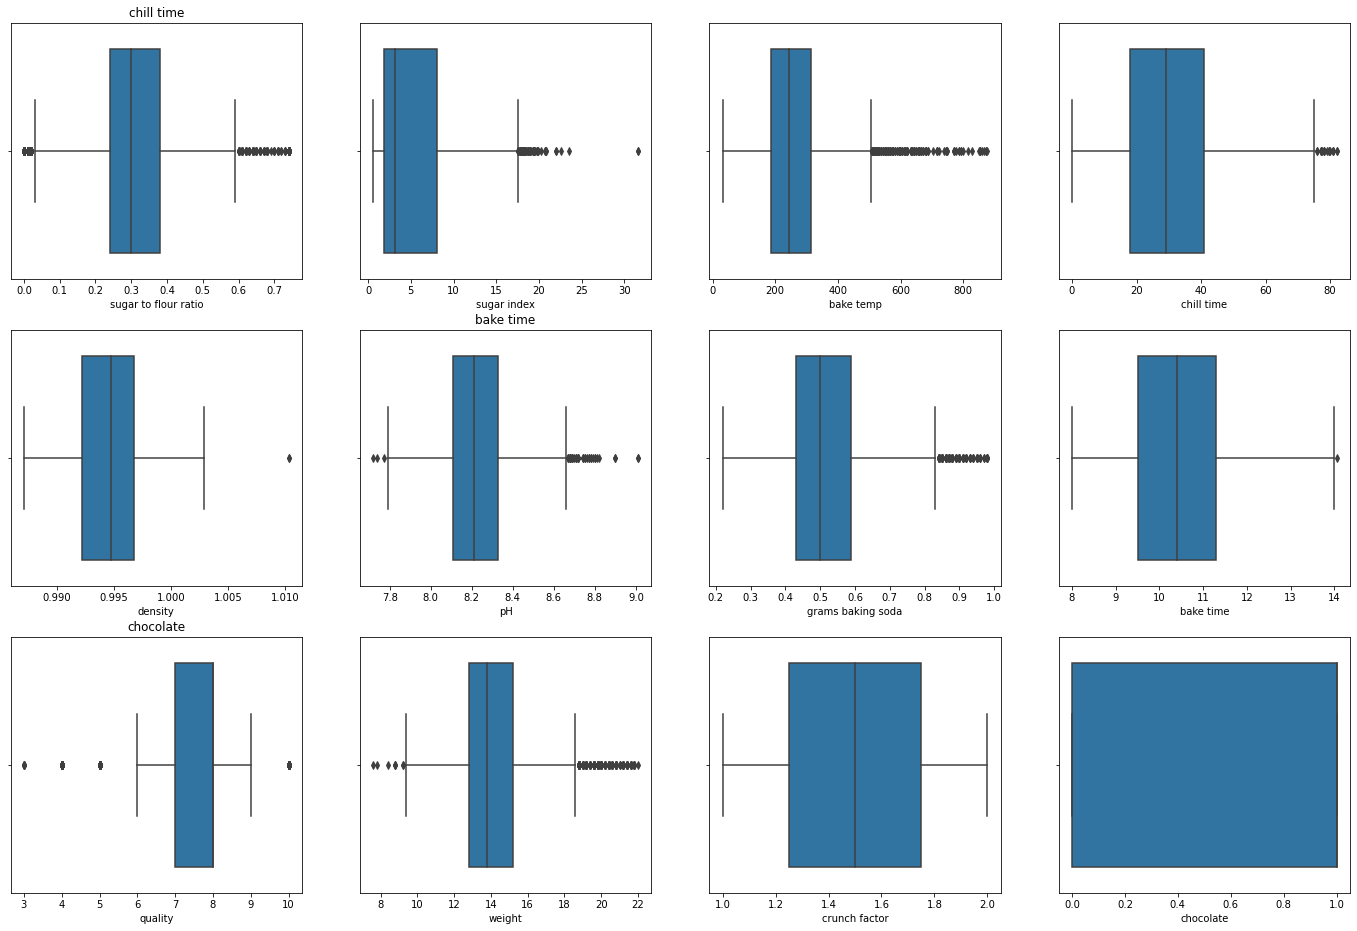

In [30]:
fig, ax = plt.subplots(3, 4, figsize = (24,16))
for i in range(4):
    sns.boxplot(cookies_cleaned[cookies_cleaned.columns[i]], ax = ax[0, i])
    sns.boxplot(cookies_cleaned[cookies_cleaned.columns[i+5]], ax = ax[1, i])
    sns.boxplot(cookies_cleaned[cookies_cleaned.columns[i+9]], ax = ax[2, i])
    ax[0,0].set_title(cookies_cleaned.columns[i])
    ax[1,1].set_title(cookies_cleaned.columns[i+5])
    ax[2,0].set_title(cookies_cleaned.columns[i+9])

In [31]:
# We can see data has a more robust distribution now.
cookies_cleaned.to_csv('data/cookies-cleaned.csv')

## Cleaning Validation Data

Having the general data cleaned, we apply the same transformations to the validation data so it has the same format as our general data. We skip the outliers treatment part as we can't drop any row.

In [32]:
cookies_validation = pd.read_csv('data/cookies_validate.csv')
cookies_validation.drop(columns = 'diameter', inplace = True)
cookies_validation.drop(columns = 'aesthetic appeal', inplace = True)
cookies_validation['bake temp'] = (cookies_validation['bake temp'] - 32)*5/9

mix_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']

for m in mix_list:
    cookies_validation[m] = 0
    cookies_validation[m] = cookies_validation['mixins'].str.contains(m).astype(int)
cookies_validation.drop(columns = 'mixins', inplace = True)
cookies_validation.reset_index(inplace = True)

from sklearn.preprocessing import OneHotEncoder
oneH = OneHotEncoder()
cookies_cat = cookies_validation.select_dtypes(include="object")
cookies_cat_1H = oneH.fit_transform(cookies_cat)
cookies_validation['1cubed/0melted'] = pd.DataFrame.sparse.from_spmatrix(cookies_cat_1H, columns = oneH.get_feature_names())['x0_cubed']
cookies_validation.drop(columns = ['index','butter type'], inplace = True)
cookies_validation.to_csv('data/cookies_to_validate.csv')

---

## Preprocessing

Having bot datasets cleaned we proceed to preprocess the data to a suitable format for the future models that we'll apply. We'll first search for columns that don't contribute to the predictive variable or columns that have high collinearity with other columns of the dataset. Both datasets will be preprocessed exactly the same, except for data splitting the general dataset.

In [33]:
                                                        # Training Data
# import df
cookies = pd.read_csv("data/cookies-cleaned.csv", index_col = 0)

# define X and y (features and target)
X = cookies.drop(columns="quality") # every column except for quality
y = cookies["quality"]

In [34]:
                                                        # Validation Data
# import df
cookies_to_validate =  pd.read_csv("data/cookies_to_validate.csv", index_col = 0)

#dropping column
cookies_to_validate.drop(columns = "id", inplace=True)

# define X and y (features and target)
X_validate = cookies_to_validate.drop(columns="quality") # every column except for SalePrice
y_validate = cookies_to_validate["quality"]

### Colinearity

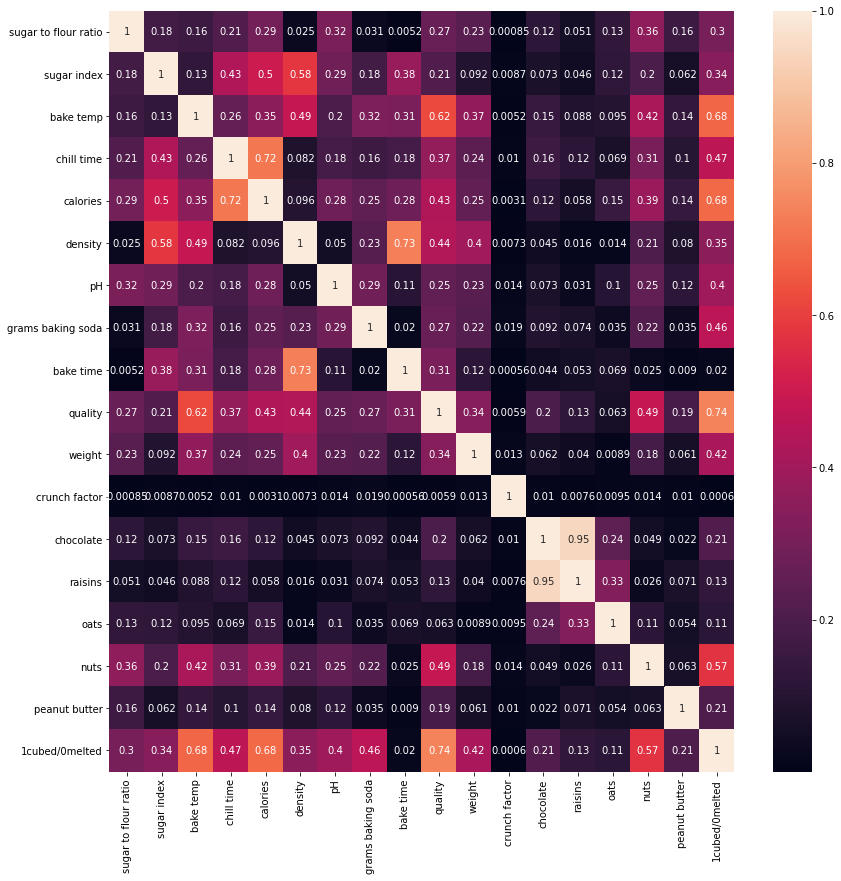

In [36]:
# Colinearity Matrix

fig, ax = plt.subplots(figsize=(14,14))
corrMatrix = cookies.corr().abs()
sns.heatmap(corrMatrix, annot=True);

In [37]:
# Dropping columns with a low correlation with y (Training Data)
X.drop(["oats", "crunch factor"], axis=1, inplace=True)
# Dropping columns with a low correlation with y (Validation Data)
X_validate.drop(["oats", "crunch factor"], axis=1, inplace=True)

In [38]:
# Diagonal Correlation Matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Identifying columns with a colinearity above 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)] 
to_drop 

['raisins']

In [39]:
# Dropping colinearity columns selected (Training Data)
X.drop(columns=to_drop, inplace=True)
# Dropping colinearity columns selected (Validation Data)
X_validate.drop(columns=to_drop, inplace=True)

### Data Split

As said above, we only split the data from the general dataset.

In [40]:
# Splitting Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

### Scaling Data

We fit the scaler with the *X_train* data and then we transform all X subsets.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initiate transformer

# Scaling general data
scaler.fit_transform(X_train) # scale data
scaler.transform(X_test);

# Scaling validation data
scaler.transform(X_validate);

## Testing Models

Then, we start testing different models with our data to determine if one is best in predicting the cookies quality. We'll deep in the model that gives the best RMSE to try to tune it and obtain a lower RMSE.

#### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
# RMSE values
from sklearn.metrics import mean_squared_error

reg_y_train_pred = reg.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, reg_y_train_pred))
print("Train RMSE:", rmse)

reg_y_test_pred = reg.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, reg_y_test_pred))
print("Test RMSE:", rmse)

reg_y_validate_pred = reg.predict(X_validate)

Train RMSE: 0.7434744813143196
Test RMSE: 0.699227268649082


#### KNeighbors Regression

In [181]:
# libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV 

# KNeighborsRegressor Cross Validation 

start_time = time.time()
neigh1 = KNeighborsRegressor()

param_distribs={"n_neighbors": randint(low=3, high=1000), 
                "weights":["uniform", "distance"],
                "p":[1,2]}

neigh1_search = RandomizedSearchCV(neigh1, 
                                   param_distribs,
                                   scoring="neg_root_mean_squared_error",
                                   n_iter=100,
                                   cv=10,
                                   n_jobs=4)

neigh1_search.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh1_search.best_score_, 2))

--- 17.157651901245117 seconds ---
-0.75


In [182]:
BN1 = KNeighborsRegressor(n_neighbors = neigh1_search.best_params_['n_neighbors'], p = neigh1_search.best_params_['p'],
                          weights = neigh1_search.best_params_['weights'] )
BN1.fit(X_train, y_train)

BN1_y_train_pred = BN1.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, BN1_y_train_pred))
print("Train RMSE:", rmse)

BN1_y_test_pred = BN1.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, BN1_y_test_pred))
print("Test RMSE:", rmse)

BN1_y_validate_pred = BN1.predict(X_validate)

Train RMSE: 0.0
Test RMSE: 0.6982289136630648


#### KNeighbors Classifier

In [46]:
# libraries
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier Cross Validation 

start_time = time.time()
neigh2 = KNeighborsClassifier()

param_distribs={"n_neighbors": randint(low=3, high=100), #randint is the function from scipy
                "weights":["uniform", "distance"],
                "p":[1,2]}

neigh2_search = RandomizedSearchCV(neigh2, # model initializer
                                   param_distribs,
                                   scoring="neg_root_mean_squared_error",
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=4)

neigh2_search.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh2_search.best_score_, 2))

--- 1.840916633605957 seconds ---
-0.85


In [47]:
BN2 = KNeighborsRegressor(n_neighbors = neigh2_search.best_params_['n_neighbors'], p = neigh2_search.best_params_['p'],
                          weights = neigh2_search.best_params_['weights'] )
BN2.fit(X_train, y_train)

BN2_y_train_pred = BN2.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, BN2_y_train_pred))
print("Train RMSE:", rmse)

BN2_y_test_pred = BN2.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, BN2_y_test_pred))
print("Test RMSE:", rmse)

BN2_y_validate_pred = BN2.predict(X_validate)

Train RMSE: 0.0
Test RMSE: 0.6995123126658632


#### Random Forest

In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RF = RandomForestRegressor(n_estimators=750)

RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=750)

In [200]:
RF_y_train_pred = RF.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, RF_y_train_pred))
print("Train RMSE:", rmse)

RF_y_test_pred = RF.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, RF_y_test_pred))
print("Test RMSE:", rmse)

RF_y_validate_pred = RF.predict(X_validate)

Train RMSE: 0.22883520667931959
Test RMSE: 0.5855099274854805


We observe that RandomForestProgressor has a promising very low RMSE so we'll try to tune it to obtain the best RandomForestRegressor. In order to achieve it we'll first conduct a randomized search cross validation to obtain the best parameters and then a grid search with values around the best parameters.

##### Randomized Search

In [55]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               scoring = 'neg_root_mean_squared_error', cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [56]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [198]:
BRF = RandomForestRegressor(n_estimators =  2000, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', 
                                max_depth =  30, bootstrap = False)
BRF.fit(X_train, y_train)
BRF_y_train_pred = BRF.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, BRF_y_train_pred))
print("Train RMSE:", rmse)

BRF_y_test_pred = BRF.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, BRF_y_test_pred))
print("Test RMSE:", rmse)

BRF_y_validate_pred = BRF.predict(X_validate)

Train RMSE: 0.000534445830746794
Test RMSE: 0.5710684056175974


##### Grid Search

In [135]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

From the resulting best parameters for the RandomForestRegressor we conduct another Grid Search CV with close values around this best parameters to see if the regressor improves.

In [141]:
rf_param_grid = {'n_estimators': [2000, 2500, 3000],
               'max_features': ['sqrt'],
               'max_depth': [25, 30, 35],
               'min_samples_split': [1, 2, 3],
               'min_samples_leaf': [1],
               'bootstrap': [False]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_search = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_grid = GridSearchCV(rf_search, rf_param_grid, scoring = 'neg_root_mean_squared_error', cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  5.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [2000, 2500, 3000]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [201]:
imp_BRF = RandomForestRegressor(n_estimators =  3000, min_samples_split = 3, min_samples_leaf = 1, max_features = 'sqrt', 
                                max_depth =  23, bootstrap = False)
imp_BRF.fit(X_train, y_train)
imp_BRF_y_train_pred = imp_BRF.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, imp_BRF_y_train_pred))
print("Train RMSE:", rmse)

imp_BRF_y_test_pred = imp_BRF.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, imp_BRF_y_test_pred))
print("Test RMSE:", rmse)

imp_BRF_y_validate_pred = imp_BRF.predict(X_validate)

Train RMSE: 0.049980163959831625
Test RMSE: 0.5706514566227899


#### Gradient Boosting Regressor

In [129]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting = GradientBoostingRegressor()

param_grid = {'n_estimators': [450,500,550,600,650]}
grid = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [450, 500, 550, 600, 650]},
             scoring='neg_mean_squared_error')

In [132]:
grid.best_params_

{'n_estimators': 500}

In [133]:
GBR = GradientBoostingRegressor(n_estimators = 500)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [228]:
GBR_y_train_pred = GBR.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, GBR_y_train_pred))
print("Train RMSE:", rmse)

GBR_y_test_pred = GBR.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, GBR_y_test_pred))
print("Test RMSE:", rmse)

GBR_y_validate_pred = GBR.predict(X_validate)

Train RMSE: 0.505033099951272
Test RMSE: 0.6408078985067845


---

## Data Visualization

We proceed with a very simple predictions visualization tables to compare predictions among models.

In [184]:
TrainPredictions = pd.DataFrame({'Linear Regression': reg_y_train_pred,
                                     'KNRegressor': BN1_y_train_pred,
                                     'KNClassifier': BN2_y_train_pred,
                                     'RandomForest': RF_y_train_pred,
                                     'BestRandomForest': BRF_y_train_pred,
                                     'ImprovedRF ': imp_BRF_y_train_pred,
                                     'True Value': y_train
                                     })
TrainPredictions

,Linear Regression,KNRegressor,KNClassifier,RandomForest,BestRandomForest,ImprovedRF,True Value
697,7.710645,8.0,8.0,7.994667,8.000244,7.994834,8
3145,7.644534,8.0,8.0,7.976000,8.000000,7.978356,8
2312,5.416056,6.0,6.0,5.829333,6.000000,5.955709,6
2176,7.438290,7.0,7.0,7.180000,7.000000,7.007671,7
1234,7.520946,7.0,7.0,6.917333,7.000000,7.000000,7
...,...,...,...,...,...,...,...
2543,6.064566,6.0,6.0,6.014667,6.000000,6.006726,6
1664,5.754716,6.0,6.0,5.834667,6.000000,5.982167,6
3157,6.263599,8.0,8.0,7.573333,8.000000,7.823667,8
4241,7.479405,7.0,7.0,7.069333,7.000000,7.001134,7


In [187]:
TestPredictions = pd.DataFrame({'Linear Regression': reg_y_test_pred,
                                     'KNRegressor': BN1_y_test_pred,
                                     'KNClassifier': BN2_y_test_pred,
                                     'RandomForest': RF_y_test_pred,
                                     'BestRandomForest': BRF_y_test_pred,
                                     'ImprovedRF ': imp_BRF_y_test_pred,
                                     'True Value': y_test
                                     })
TestPredictions.sample(10)

,Linear Regression,KNRegressor,KNClassifier,RandomForest,BestRandomForest,ImprovedRF,True Value
1357,7.767785,7.591720,7.545593,7.720000,7.787000,7.820666,7
3179,8.181797,7.745212,7.802074,7.874667,7.875750,7.856521,8
4587,8.109151,7.905363,7.940665,8.493333,8.466600,8.471304,8
2811,7.487973,7.978165,7.996341,7.914667,7.992530,7.984964,8
3252,7.674920,8.000000,8.000000,7.998667,8.000157,7.988726,8
2862,7.006385,7.355823,7.345152,6.969333,7.008000,7.045092,8
3951,5.049325,6.109079,6.305956,5.184000,5.292000,5.272367,5
3969,5.774412,5.421382,5.481415,5.040000,5.505000,5.487500,6
3655,8.483662,8.522930,8.514601,8.756000,8.800510,8.798593,9
9,7.555400,7.000000,7.000000,7.010667,7.000000,7.000459,7


In [207]:
# Validation Data

ValidationPredictions = pd.DataFrame({'Linear Regression': reg_y_validate_pred,
                                     'KNRegressor': BN1_y_validate_pred,
                                     'KNClassifier': BN2_y_validate_pred,
                                     'RandomForest': RF_y_validate_pred,
                                     'BestRandomForest': BRF_y_validate_pred,
                                     'ImprovedRF ': imp_BRF_y_validate_pred
                                     })
ValidationPredictions.sample(10)

,Linear Regression,KNRegressor,KNClassifier,RandomForest,BestRandomForest,ImprovedRF
24,7.342004,7.000000,7.000000,7.052000,7.000000,7.014952
728,5.732013,5.890257,5.841318,5.634667,5.804000,5.775500
435,7.582339,7.000000,7.000000,7.338667,7.000279,7.044113
415,7.646879,8.000000,8.000000,8.014667,8.000000,7.993365
461,8.543178,8.317917,8.323481,8.217333,8.209662,8.233051
89,8.354064,10.000000,10.000000,9.497333,10.000000,9.861530
409,8.107611,8.182867,8.164478,7.985333,7.888056,7.879051
719,5.428873,5.899480,5.904253,5.341333,5.518000,5.509900
643,8.073729,8.152170,8.179732,8.177333,8.069486,8.066611
770,6.225914,5.938226,5.909577,6.900000,6.358000,6.357833


In [164]:
# Optional function to round predictions with very low distance to the integer.
def rounding(arr):
    rounded = []
    for val in arr:
        if abs(val - round(val)) < 0.15:
            rounded.append(round(val))
        else:
            rounded.append(val)
    return rounded

In [209]:
ValidationPredictions.to_csv('data/predictions.csv')